In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns=[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]

df=pd.read_csv('phishing.txt' ,header=None , names = columns)
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11055 non-null  int64
 1   LongURL              11055 non-null  int64
 2   ShortURL             11055 non-null  int64
 3   Symbol@              11055 non-null  int64
 4   Redirecting//        11055 non-null  int64
 5   PrefixSuffix-        11055 non-null  int64
 6   SubDomains           11055 non-null  int64
 7   HTTPS                11055 non-null  int64
 8   DomainRegLen         11055 non-null  int64
 9   Favicon              11055 non-null  int64
 10  NonStdPort           11055 non-null  int64
 11  HTTPSDomainURL       11055 non-null  int64
 12  RequestURL           11055 non-null  int64
 13  AnchorURL            11055 non-null  int64
 14  LinksInScriptTags    11055 non-null  int64
 15  ServerFormHandler    11055 non-null  int64
 16  InfoEmail            1

In [4]:
df.describe()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Q) Which features are most correlated with phishing websites?

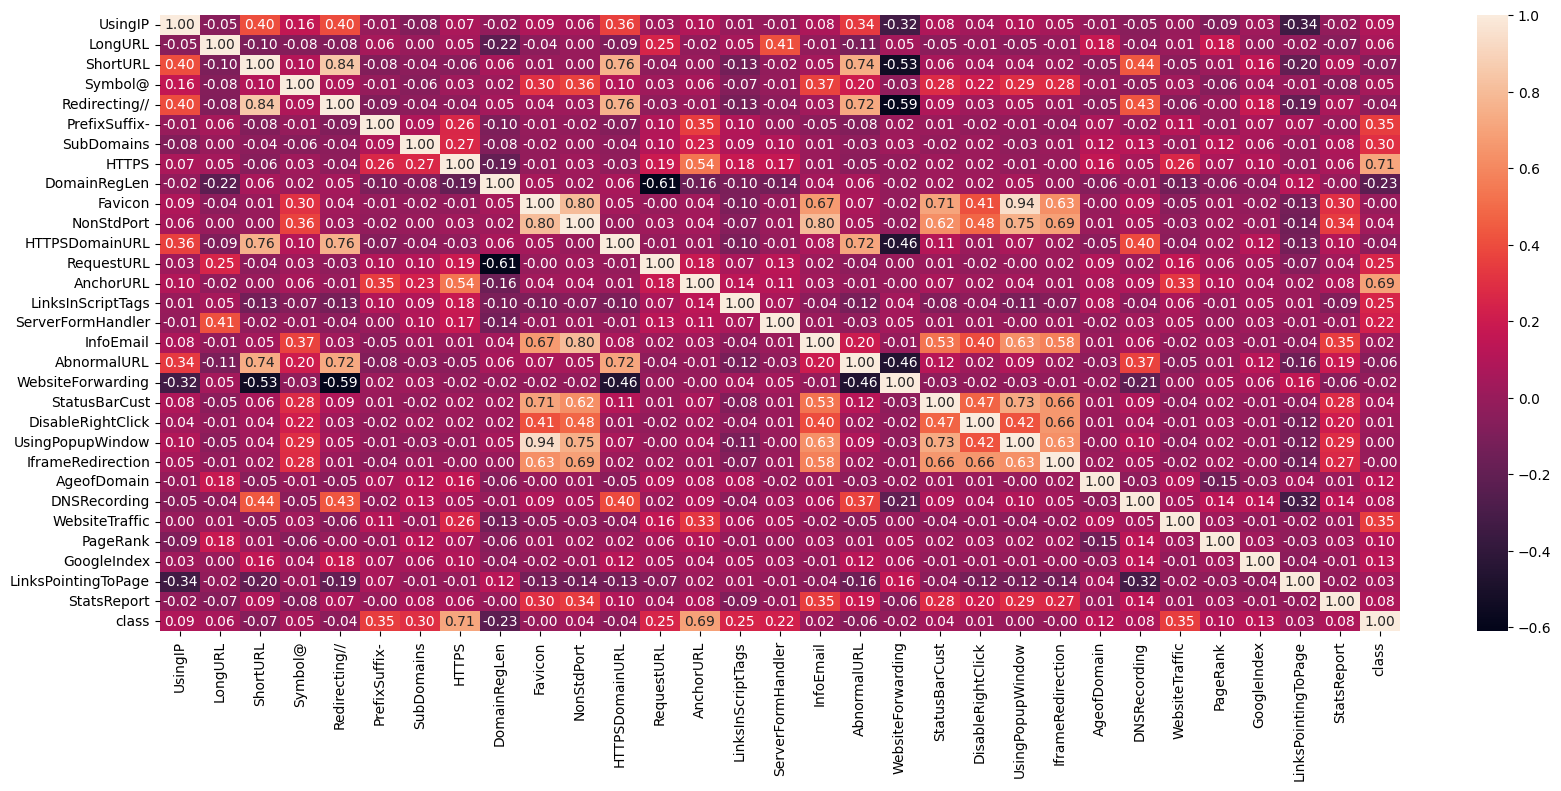

In [5]:
mat=df.corr(numeric_only=True)
plt.figure(figsize=(20,8))
sns.heatmap(mat , annot =True , fmt ='.2f')
plt.show()

Based on the heatmap, many of the features show weak negative correlation with each other, as their correlation values lie between 0 and -0.3. This suggests that as one feature slightly increases, the other tends to slightly decrease, but the relationship is not strong.

Q)  Which features have the highest imbalance between classes?

In [6]:
# Group by the target column (e.g., 'Phishing') and calculate mean for each feature
class_feature_means = df.groupby('class').mean(numeric_only=True).T
#Calculate the absolute difference in means between the two classes

class_feature_means['difference'] = abs(class_feature_means[-1] - class_feature_means[1])

# Sort by highest difference
imbalanced_features = class_feature_means.sort_values(by='difference', ascending=False)

# Display top features with most imbalance
print(imbalanced_features.head(10))


class                    -1         1  difference
HTTPS             -0.479788  0.832223    1.312011
AnchorURL         -0.632095  0.365438    0.997532
WebsiteTraffic    -0.033891  0.542797    0.576688
RequestURL        -0.092283  0.408803    0.501086
SubDomains        -0.209473  0.281468    0.490942
PrefixSuffix-     -1.000000 -0.524119    0.475881
DomainRegLen      -0.098408 -0.526393    0.427985
LinksInScriptTags -0.330747  0.050999    0.381746
ServerFormHandler -0.784198 -0.445834    0.338364
AgeofDomain       -0.074724  0.169401    0.244125


Q) Are older domains more likely to be legitimate than newer ones (AgeofDomain)?

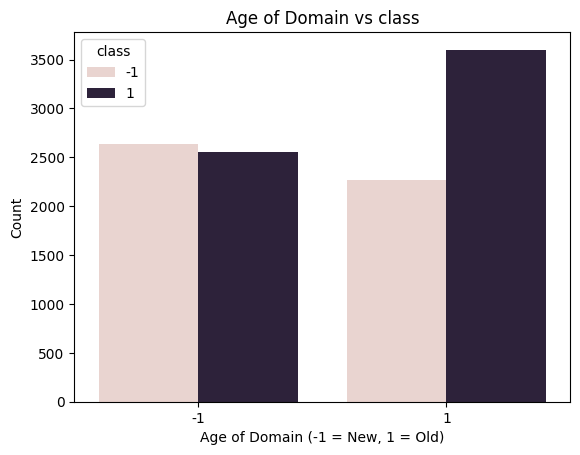

In [7]:
sns.countplot(x='AgeofDomain', hue='class', data=df)
plt.title('Age of Domain vs class')
plt.xlabel('Age of Domain (-1 = New, 1 = Old)')
plt.ylabel('Count')
plt.legend(title='class')
plt.show()


This indicates that older websites in the dataset are more commonly associated with phishing than with legitimate activity.

Q) Which features are binary (0/1), and which ones have more than 2 unique values?

In [8]:
uni_count=df.nunique()
print(uni_count)

UsingIP                2
LongURL                3
ShortURL               2
Symbol@                2
Redirecting//          2
PrefixSuffix-          2
SubDomains             3
HTTPS                  3
DomainRegLen           2
Favicon                2
NonStdPort             2
HTTPSDomainURL         2
RequestURL             2
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
InfoEmail              2
AbnormalURL            2
WebsiteForwarding      2
StatusBarCust          2
DisableRightClick      2
UsingPopupWindow       2
IframeRedirection      2
AgeofDomain            2
DNSRecording           2
WebsiteTraffic         3
PageRank               2
GoogleIndex            2
LinksPointingToPage    3
StatsReport            2
class                  2
dtype: int64


In [9]:
binary=uni_count[uni_count==2]
print(binary)

UsingIP              2
ShortURL             2
Symbol@              2
Redirecting//        2
PrefixSuffix-        2
DomainRegLen         2
Favicon              2
NonStdPort           2
HTTPSDomainURL       2
RequestURL           2
InfoEmail            2
AbnormalURL          2
WebsiteForwarding    2
StatusBarCust        2
DisableRightClick    2
UsingPopupWindow     2
IframeRedirection    2
AgeofDomain          2
DNSRecording         2
PageRank             2
GoogleIndex          2
StatsReport          2
class                2
dtype: int64


In [10]:
non_binary=uni_count[uni_count>2]
print(non_binary)

LongURL                3
SubDomains             3
HTTPS                  3
AnchorURL              3
LinksInScriptTags      3
ServerFormHandler      3
WebsiteTraffic         3
LinksPointingToPage    3
dtype: int64


Q) How many phishing vs. legitimate websites are in the dataset?

In [11]:
df['class'].value_counts()

class
 1    6157
-1    4898
Name: count, dtype: int64

In [12]:
# Convert -1 to 0 in the 'class' column
df['class'] = df['class'].replace(-1, 0)
df['class'].value_counts()

class
1    6157
0    4898
Name: count, dtype: int64

Q) 	Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 

In [13]:
lr=LogisticRegression(C=100) #C is the inverse of the regularization strength 

In [14]:
X=df.drop(columns=['class'])
y=df['class']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.30 , random_state=12)

In [15]:
lr.fit(X_train , y_train)

LogisticRegression(C=100)

Q) Print count of misclassified samples in the test data prediction as well as the accuracy score of the model. 

In [16]:
y_pred=lr.predict(X_test)
ac=accuracy_score(y_test,y_pred)
print(ac) #accuracy score on test data

0.9234247814290021


In [17]:
misclass=(y_test !=y_pred).sum()
print(misclass)

254


A total of 254 samples were misclassified by the logistic model on the test dataset.

In [18]:
y_prob=lr.predict_proba(X_test)[:,1]
fpr, tpr , threshold = roc_curve(y_test , y_prob)
auc_curve =roc_auc_score(y_test , y_prob)

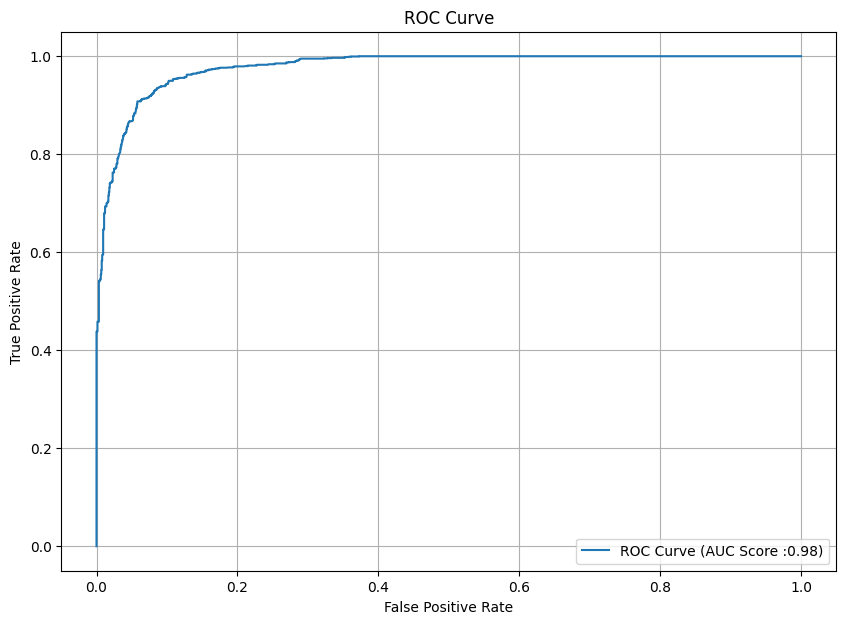

In [19]:
plt.figure(figsize=(10,7))
plt.plot(fpr , tpr, label =[f"ROC Curve (AUC Score :{auc_curve:.2f})"])
plt.plot(label= auc_curve )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Q) Can a logistic regression model perform well with just 2 features like PrefixSuffix- and AnchorURL?

In [20]:
df['PrefixSuffix-']. unique()

array([-1,  1])

In [21]:
df['AnchorURL'].unique()

array([-1,  0,  1])

In [22]:
X1=df[['AnchorURL' , 'PrefixSuffix-']]
y1=df['class']

In [23]:
X_train4 , X_test4 , y_train_4 , y_test4 = train_test_split(X1 , y1 , test_size=0.30, random_state=23)
lr.fit(X_train4 , y_train_4)

LogisticRegression(C=100)

In [24]:
y_pred = lr.predict(X_test4)
accuracy=accuracy_score(y_test4 , y_pred)
print(accuracy)

0.8459451311425987


Model accuracy with two input parameters is 0.8459, which is lower than the accuracy achieved using the complete feature set (0.9234).

Q) What is the feature importance ranking from a Random Forest model?

In [25]:
rf=RandomForestClassifier()
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X , y , test_size=0.20 , random_state=12)

In [26]:
rf.fit(X_train1 , y_train1)

RandomForestClassifier()

In [27]:
y_pred1=rf.predict(X_test1)
acc2=accuracy_score(y_test1 , y_pred1)
print(acc2)  # accuracy score on test data

0.9742198100407056


In [28]:
y_tr1=rf.predict(X_train1)
acc3=accuracy_score(y_train1 , y_tr1)
print(acc3) # Accuracy score on train data

0.9893713251922207


In [29]:
print('Classfication report : ' )
print(classification_report(y_test1 , y_pred1))

Classfication report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1001
           1       0.97      0.99      0.98      1210

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [30]:
print('Confusion Matrix:')
print(confusion_matrix(y_test1 , y_pred1))

Confusion Matrix:
[[ 962   39]
 [  18 1192]]


In [31]:
df_imp=pd.DataFrame(
    {
        'Feature':X.columns , 
        'Importance':rf.feature_importances_
    }
).sort_values(by='Importance' , ascending =False)
print(df_imp)


                Feature  Importance
7                 HTTPS    0.308661
13            AnchorURL    0.258025
25       WebsiteTraffic    0.073604
6            SubDomains    0.063923
5         PrefixSuffix-    0.044853
14    LinksInScriptTags    0.044361
15    ServerFormHandler    0.019909
12           RequestURL    0.018561
28  LinksPointingToPage    0.018373
8          DomainRegLen    0.016217
23          AgeofDomain    0.015942
0               UsingIP    0.013812
24         DNSRecording    0.013009
27          GoogleIndex    0.012928
26             PageRank    0.011752
1               LongURL    0.008609
11       HTTPSDomainURL    0.006373
2              ShortURL    0.005356
16            InfoEmail    0.005018
18    WebsiteForwarding    0.004928
3               Symbol@    0.004895
29          StatsReport    0.004874
21     UsingPopupWindow    0.004734
17          AbnormalURL    0.004091
4         Redirecting//    0.004015
9               Favicon    0.003844
19        StatusBarCust    0

Q) How does the model performance vary across different classifiers (Logistic Regression, Random Forest, XGBoost)?

In [32]:
models={
    "Logitsic Regression": LogisticRegression(),
    "XGB Classifier" : XGBClassifier(), 
    "Random Forest Classifier" : RandomForestClassifier()
}

In [33]:
for name , m1 in models.items():
    m1.fit(X_train , y_train)
    y_pred =m1.predict(X_test)
    acc=accuracy_score(y_test , y_pred)
    print("Accuracy Score for", name , "is",acc)
   

Accuracy Score for Logitsic Regression is 0.9240277359059391
Accuracy Score for XGB Classifier is 0.966536026529997
Accuracy Score for Random Forest Classifier is 0.9698522761531504


The Random Forest Classifier demonstrates the highest performance among the models.